In [ ]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import the dataset
from google.colab import files 


uploaded = files.upload()

import io
ds = pd.read_csv(io.BytesIO(uploaded['glass.csv'])) 
print(ds)

Saving glass.csv to glass.csv
          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]


In [ ]:
#checking null values
ds.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [ ]:
ds.keys()

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [ ]:
ds.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
#count values of types of glass
ds.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

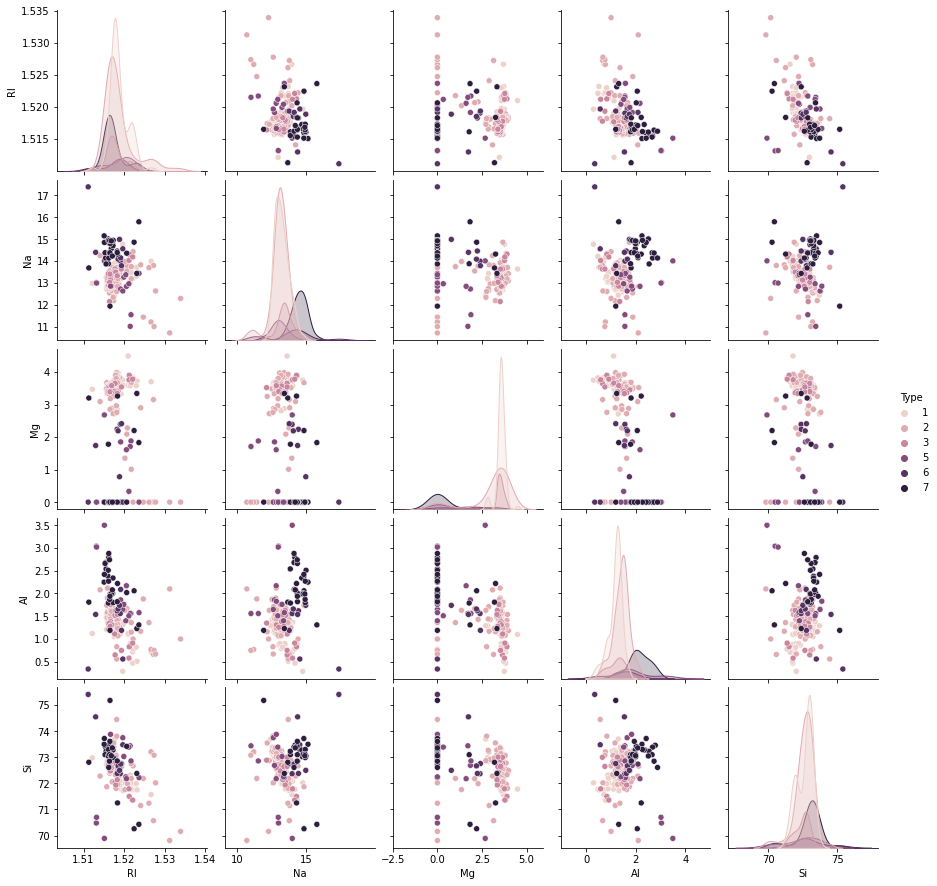

In [ ]:
#graph between first 5 features of dataset
sns.pairplot(ds,hue ='Type',vars=['RI','Na','Mg','Al','Si'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


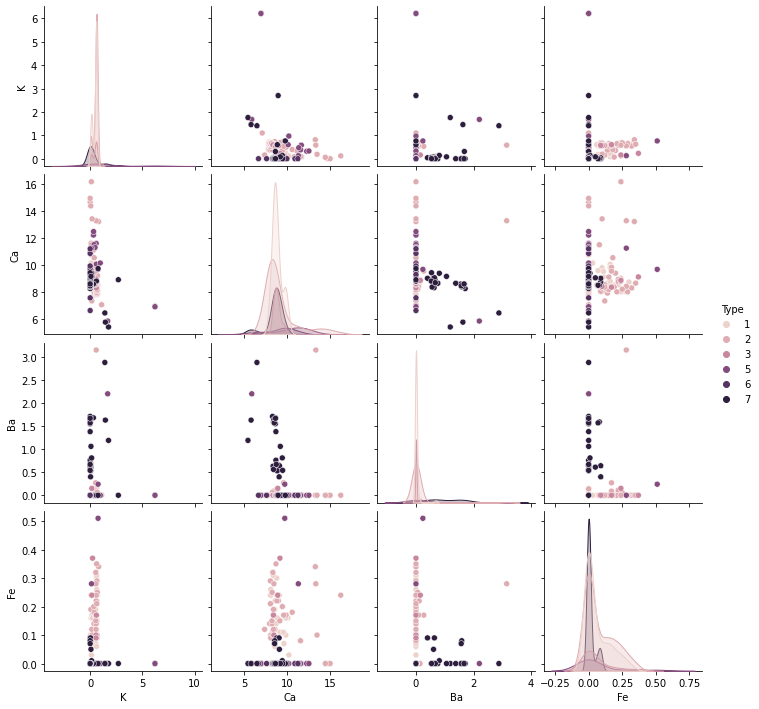

In [ ]:
#graph between left features of dataset
sns.pairplot(ds,hue ='Type',vars=['K','Ca','Ba','Fe'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


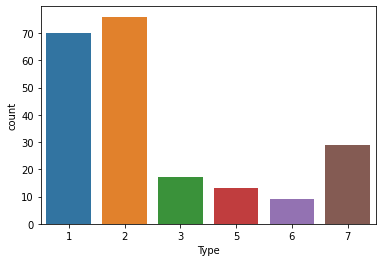

In [ ]:
sns.countplot(ds['Type'])

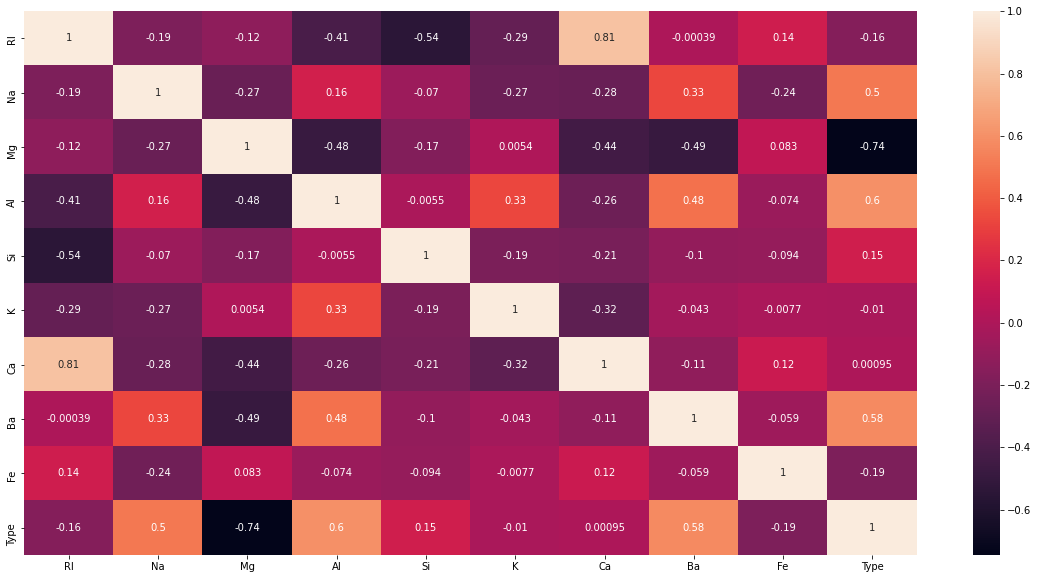

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(ds.corr(),annot=True)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit(ds.drop('Type',axis=1))
scaled_features = sc.transform(ds.drop('Type',axis=1))
dataset = pd.DataFrame(scaled_features,columns = ds.columns[:-1])
print(dataset)

           RI        Na        Mg  ...        Ca        Ba        Fe
0    0.872868  0.284953  1.254639  ... -0.145766 -0.352877 -0.586451
1   -0.249333  0.591817  0.636168  ... -0.793734 -0.352877 -0.586451
2   -0.721318  0.149933  0.601422  ... -0.828949 -0.352877 -0.586451
3   -0.232831 -0.242853  0.698710  ... -0.519052 -0.352877 -0.586451
4   -0.312045 -0.169205  0.650066  ... -0.624699 -0.352877 -0.586451
..        ...       ...       ...  ...       ...       ...       ...
209 -0.704815  0.898681 -1.865511  ...  0.157088  1.783978 -0.586451
210 -0.500178  1.856097 -1.865511  ... -0.392276  2.852405 -0.586451
211  0.754046  1.168721 -1.865511  ... -0.364103  2.953200 -0.586451
212 -0.612399  1.193270 -1.865511  ... -0.335931  2.812087 -0.586451
213 -0.414363  1.009152 -1.865511  ... -0.237327  3.013677 -0.586451

[214 rows x 9 columns]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_features,ds['Type'],test_size=0.2,random_state=0)

In [ ]:
print(X_train)

[[-0.17341986 -0.89340419  0.68481178 ... -0.18098196 -0.35287683
  -0.5864509 ]
 [-0.15691691 -0.26740179  0.84464125 ... -0.36410319 -0.35287683
   2.29388828]
 [-0.49357724 -0.21830357  0.59447339 ... -0.60356941 -0.35287683
  -0.5864509 ]
 ...
 [-0.42426482  0.38314972  0.69176089 ... -0.75851814 -0.35287683
  -0.5864509 ]
 [ 2.74100244  0.71456275  0.7056591  ...  0.60784794 -0.35287683
   0.44224166]
 [-1.70159374 -0.50061837 -1.86551055 ... -1.42761494 -0.35287683
  -0.5864509 ]]


In [ ]:
len(X_train)

171

In [ ]:
print(X_test)

[[-3.61553581e-01  1.58605628e+00 -1.86551055e+00  1.79700922e+00
   8.14077586e-01 -7.63918639e-01 -4.90385747e-03  9.77617652e-01
  -5.86450902e-01]
 [-1.30512175e-01 -8.19756846e-01  5.52778744e-01 -1.90536451e-01
   3.99963538e-01  2.19688551e-01 -1.95068209e-01 -3.52876828e-01
  -5.86450902e-01]
 [-6.48705043e-01 -1.05297342e+00  5.52778744e-01  8.53426931e-01
   7.49372266e-01  2.04319689e-01 -6.17655658e-01 -3.52876828e-01
   3.39372407e-01]
 [ 2.25951709e-01  7.26837305e-01 -2.04673937e-01  2.31064145e-01
  -3.63559237e-01 -7.63918639e-01  4.31769840e-01 -3.52876828e-01
  -5.86450902e-01]
 [ 1.75742617e+00  3.94621264e-02 -1.86551055e+00  2.71216583e-01
  -5.57675197e-01 -2.72115044e-01  2.31228399e+00 -3.52876828e-01
  -5.86450902e-01]
 [-8.13734618e-01 -4.76069257e-01  6.22269816e-01  1.30683051e-01
   6.07020562e-01  2.96532863e-01 -7.02173148e-01 -3.52876828e-01
  -5.86450902e-01]
 [ 1.47138519e-02 -4.76069257e-01  6.50066245e-01 -7.72746799e-01
  -4.02382429e-01  2.1968855

In [ ]:
len(X_test)

43

In [ ]:
#applying KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
#prediction on test dataset
prediction = knn.predict(X_test)
print(prediction)
print(Y_test)

[7 1 2 6 2 2 1 2 2 1 1 2 1 2 2 7 1 2 3 1 5 1 7 1 1 1 7 1 2 2 1 1 2 1 1 1 1
 1 1 7 2 2 2]
197    7
37     1
89     2
176    6
170    5
75     2
96     2
137    2
5      1
83     2
55     1
145    2
160    3
112    2
74     2
202    7
126    2
12     1
153    3
158    3
168    5
141    2
194    7
189    7
144    2
18     1
208    7
15     1
86     2
71     2
7      1
63     1
143    2
97     2
136    2
162    3
33     1
154    3
90     2
191    7
106    2
180    6
139    2
Name: Type, dtype: int64


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,prediction)
print(cm)

[[ 7  2  0  0  0  0]
 [ 8 11  0  0  0  0]
 [ 4  0  1  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  1  0  0  1  0]
 [ 1  0  0  0  0  5]]


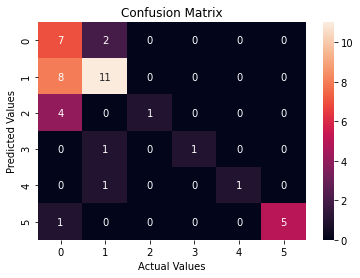

In [ ]:
#plotting the heatmap
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [ ]:

#accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test,prediction)*100
print(acc)

60.46511627906976


In [ ]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           1       0.35      0.78      0.48         9
           2       0.73      0.58      0.65        19
           3       1.00      0.20      0.33         5
           5       1.00      0.50      0.67         2
           6       1.00      0.50      0.67         2
           7       1.00      0.83      0.91         6

    accuracy                           0.60        43
   macro avg       0.85      0.57      0.62        43
weighted avg       0.75      0.60      0.61        43



In [ ]:
#graph to predict the value of n_neighbors for maximum accuracy and minimum error
accuracy_rate = []
for i in range(1,51):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train,Y_train)
  pred = knn.predict(X_test)
  accuracy_rate.append(1-np.mean(pred != Y_test))
  #pred!=Y_test is the error

Text(0, 0.5, 'Accuracy Rate')

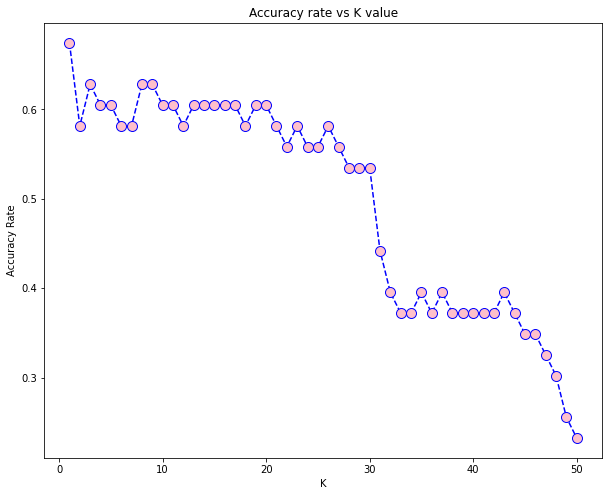

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,51),accuracy_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='pink',markersize=10)
plt.title('Accuracy rate vs K value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
#from graph below maximum accuracy will be at n-neighbors=1

In [ ]:
error_rate = []
for i in range(1,51):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train,Y_train)
  pred = knn.predict(X_test)
  error_rate.append(np.mean(pred != Y_test))

Text(0, 0.5, 'Error Rate')

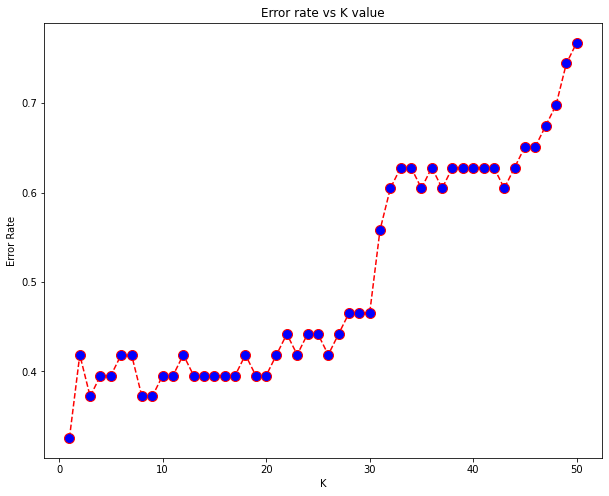

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,51),error_rate,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')